# Generador de señales

## Franco Rissotto

### Importación de modulos

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

### Declaración de funciones

In [6]:
# Funcion senoidal
#
# Tiene tres parametros obligatorios: la frecuencia de sampleo, el numero de 
# muestras, y la frecuencia del seno. Retorna el vector temporal y los valores 
# del seno.
def mi_funcion_sen(fs, nn, ff, vmax = 1, dc = 0, ph = 0):

    ts = 1/fs # Tiempo de muestreo (s)
    t_simul = nn*ts # Tiempo de simulacion (s)

    # Vector de tiempo
    tt = np.arange(start = 0, stop = t_simul, step = ts)

    # Calculo de la senoidal, fase en radianes
    xx = vmax*np.sin(2*np.pi*ff*tt + ph) + dc
    
    return tt, xx


# Funcion cuadrada
#
# Tiene tres parametros obligatorios: la frecuencia de sampleo, el numero de 
# muestras, y la frecuencia de la señal. Retorna el vector temporal y los 
# valores de amplitud.
def mi_funcion_cuadrada(fs, nn, ff, vmax = 1, offset = 0, dc = 50, ph = 0):

    ts = 1/fs # Tiempo de muestreo (s)
    t_simul = nn*ts # Tiempo de simulacion (s)

    # Vector de tiempo
    tt = np.arange(start = 0, stop = t_simul, step = ts)
    
    dc = dc/100 # Ciclo de trabajo no porcentual
    ph = (fs/ff) * ph/(2*np.pi) # Fase en muestras, a partir de radianes
    
    xx = vmax*np.roll(sig.square(2*np.pi*ff*tt, duty = dc), int(ph)) + offset

    return tt, xx

### Ejemplo de uso

In [7]:
fs = 100  # Frecuencia de muestreo (Hz)
N = 200   # Cantidad de muestras

tt1, xx1 = mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = N, fs = fs)

tt2, xx2 = mi_funcion_cuadrada(vmax = 0.5, offset = 0.5, ff = 1, dc = 30, ph = np.pi, nn = N, fs = fs)

### Visualización

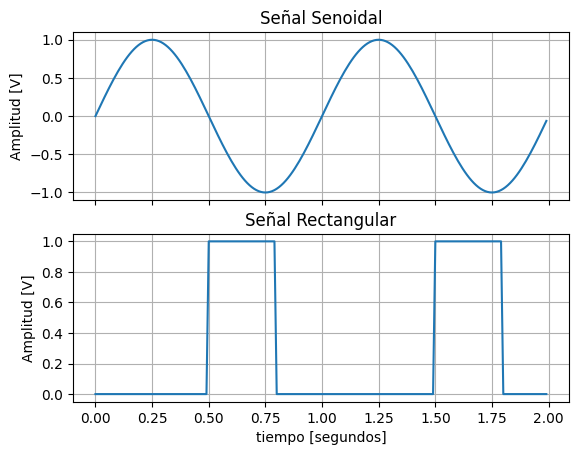

In [8]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(tt1, xx1)
ax1.set(title= 'Señal Senoidal', xlabel='tiempo [segundos]', ylabel='Amplitud [V]')
ax1.grid()
ax1.label_outer()

ax2.plot(tt2, xx2)
ax2.set(title= 'Señal Rectangular', xlabel='tiempo [segundos]', ylabel='Amplitud [V]')
ax2.grid()